In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.fft import fft, fftshift

In [3]:
import wavesim_functions as wave

In [4]:
hs = 10.
tp = 12.
a = 20.
depth = 100
cond = True

z_num = 150
z_range = np.linspace(-depth, 50, z_num)
dz = z_range[1] - z_range[0]

freq = 1.00  # sample points per second
period = 100  # total time range
nT = np.floor(period*freq)  # number of time points to evaluate
t_num = int(nT)  # to work with rest of the code

dt = 1/freq  # time step is determined by frequency
t_range = np.linspace(-nT/2, nT/2 - 1, int(nT)) * dt  # centering time around 0

f_range = np.linspace(1e-3, nT - 1, int(nT)) / (nT / freq)  # selecting frequency range from 0 to freq
om_range = f_range * (2*np.pi)

In [5]:
# get density
jnswp_dens = wave.djonswap(f_range, hs, tp)

In [6]:
# get wave surface and kinematics
eta_fft, u_x_fft, u_z_fft, du_x_fft, du_z_fft = wave.fft_random_wave_sim(z_range, depth, a, om_range, jnswp_dens, cond)

<function matplotlib.pyplot.show(close=None, block=None)>

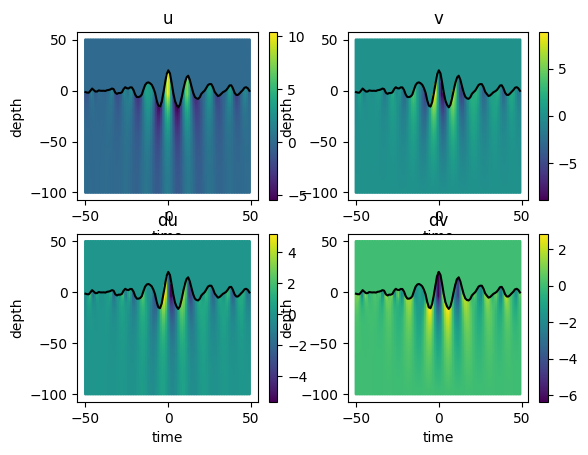

In [7]:
# plot wave surface and kinematics
z_grid, t_grid = np.meshgrid(z_range, t_range)

plt.figure()

plt.subplot(2, 2, 1)
plt.scatter(t_grid.flatten(), z_grid.flatten(), s=1, c=u_x_fft.flatten())
plt.plot(t_range, eta_fft[0], '-k')
plt.xlabel('time')
plt.ylabel('depth')
plt.title('u')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.scatter(t_grid.flatten(), z_grid.flatten(), s=1, c=u_z_fft.flatten())
plt.plot(t_range, eta_fft[0], '-k')
plt.xlabel('time')
plt.ylabel('depth')
plt.title('v')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.scatter(t_grid.flatten(), z_grid.flatten(), s=1, c=du_x_fft.flatten())
plt.plot(t_range, eta_fft[0], '-k')
plt.xlabel('time')
plt.ylabel('depth')
plt.title('du')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.scatter(t_grid.flatten(), z_grid.flatten(), s=1, c=du_z_fft.flatten())
plt.plot(t_range, eta_fft[0], '-k')
plt.xlabel('time')
plt.ylabel('depth')
plt.title('dv')
plt.colorbar()

plt.show

In [8]:
# get morison load
F = np.empty((t_num, z_num))
for i_t, t in enumerate(t_range):
    for i_z, z in enumerate(z_range):
        F[i_t, i_z] = wave.morison_load(u_x_fft[i_t, i_z], du_x_fft[i_t, i_z])
base_shear = np.sum(F, axis=1) * dz / 1e6  # 1e6 converts to MN from N


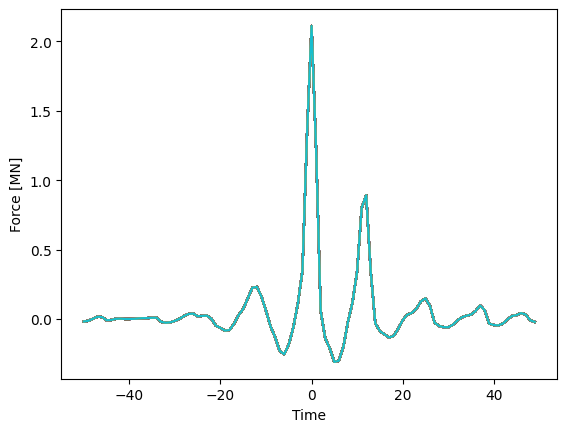

In [9]:
# plot morison load
plt.figure()
plt.plot(t_grid, base_shear)
plt.ylabel('Force [MN]')
plt.xlabel('Time')

plt.show()